In [58]:
import pandas as pd
from sklearn import linear_model
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("dataGameWonMoreThan1500WithColumnNames.csv")

In [60]:
df
df = pd.get_dummies(df)
df

,Unnamed: 0,ghostUp,ghostDown,ghostLeft,ghostRight,wallUp,wallDown,wallLeft,wallRight,foodUp,...,legalPositionUp,legalPositionDown,legalPositionULeft,legalPositionRight,pacmanPositionX,pacmanPositionY,labelNextAction_East,labelNextAction_North,labelNextAction_South,labelNextAction_West
0,0,False,False,False,False,True,True,False,False,False,...,False,False,True,True,0.45,0.142857,0,0,0,1
1,1,False,False,False,False,True,True,False,False,False,...,False,False,True,True,0.40,0.142857,0,0,0,1
2,2,False,False,False,False,True,True,False,False,False,...,False,False,True,True,0.35,0.142857,0,0,0,1
3,3,False,False,False,False,False,True,False,False,True,...,True,False,True,True,0.30,0.142857,0,0,0,1
4,4,False,False,False,False,True,True,False,False,False,...,False,False,True,True,0.25,0.142857,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45820,5541,False,False,False,False,False,False,True,True,True,...,True,True,False,False,0.05,0.428571,0,1,0,0
45821,5542,False,False,False,False,False,False,True,True,True,...,True,True,False,False,0.05,0.571429,0,1,0,0
45822,5543,False,False,False,False,True,False,True,False,False,...,False,True,False,True,0.05,0.714286,1,0,0,0
45823,5544,False,False,False,False,True,True,False,False,False,...,False,False,True,True,0.10,0.714286,1,0,0,0


In [61]:
corr = df.corr()

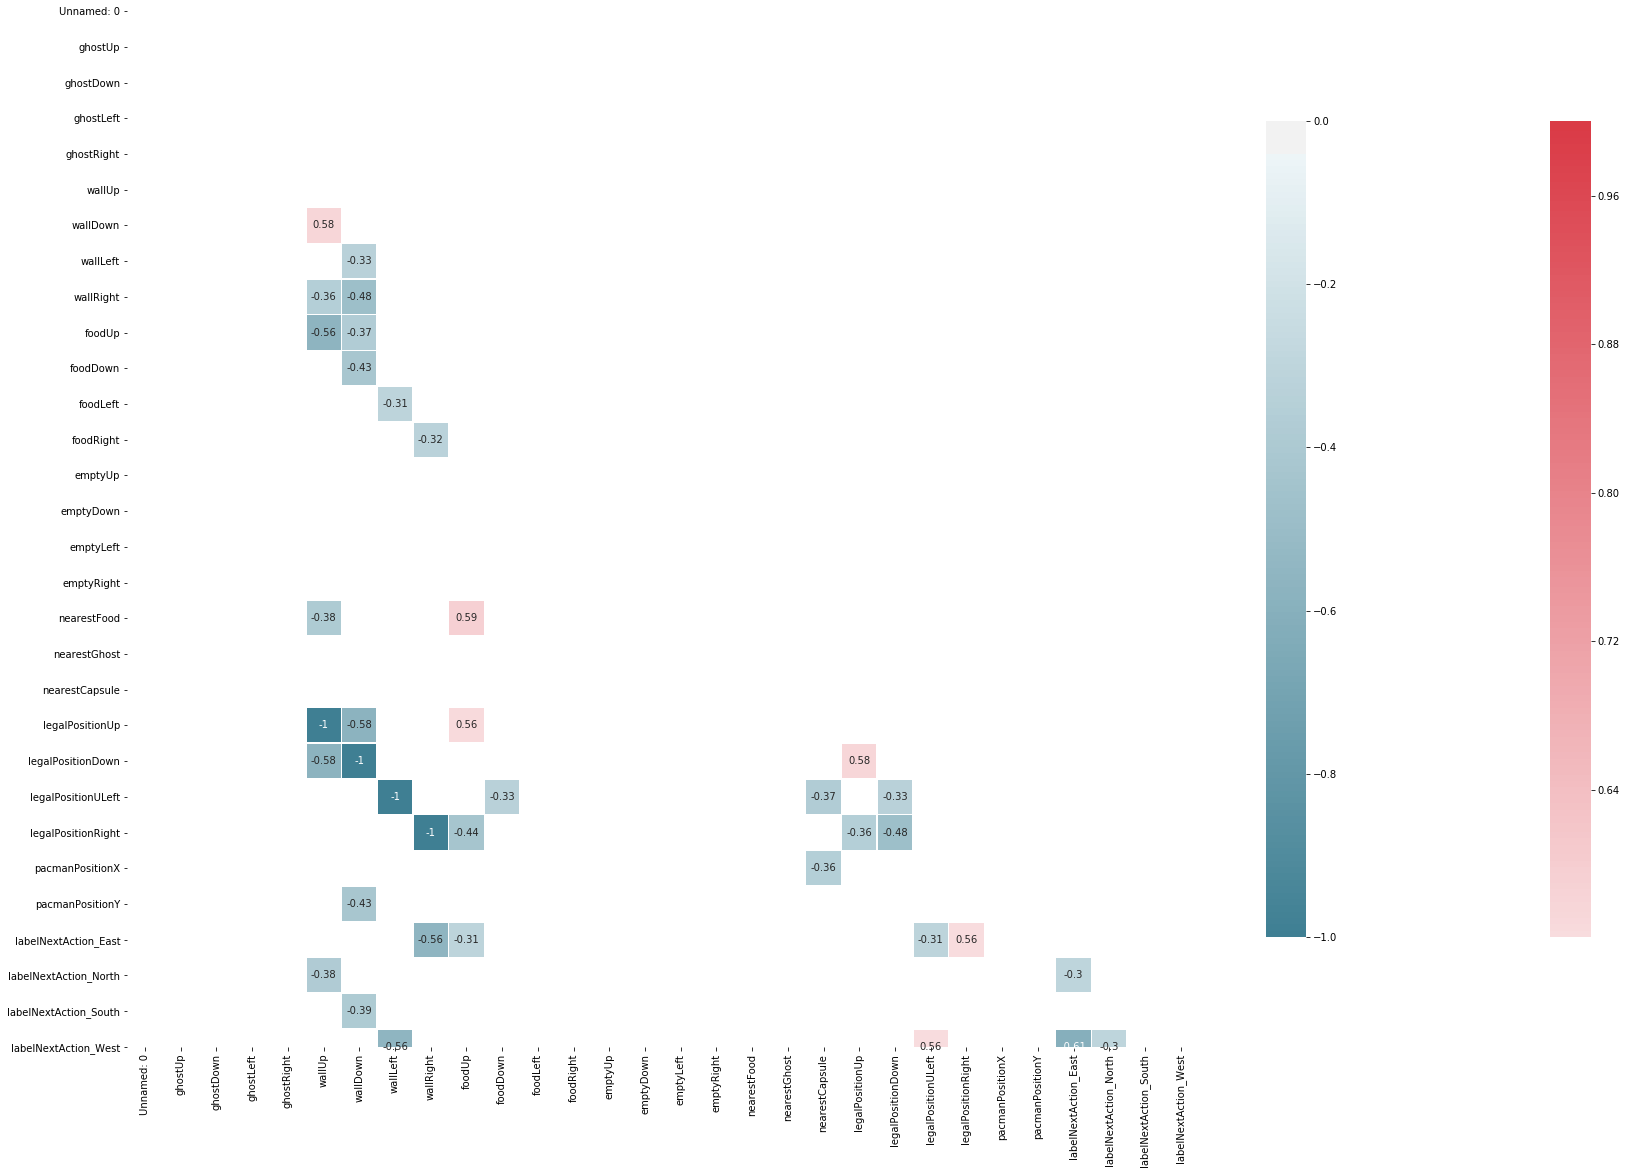

In [62]:


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmapInvers = sns.diverging_palette(200, 215, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr[corr > 0.5], mask=mask, cmap=cmap, vmax= 1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
sns.heatmap(corr[corr < -0.3], mask=mask, cmap=cmap, vmax= 0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


In [63]:
mostCorrelated = (corr["labelNextAction_East"].sort_values(ascending=False)[corr["labelNextAction_East"] > 0.4]).index
mostCorrelated

Index(['labelNextAction_East', 'legalPositionRight', 'foodRight'], dtype='object')

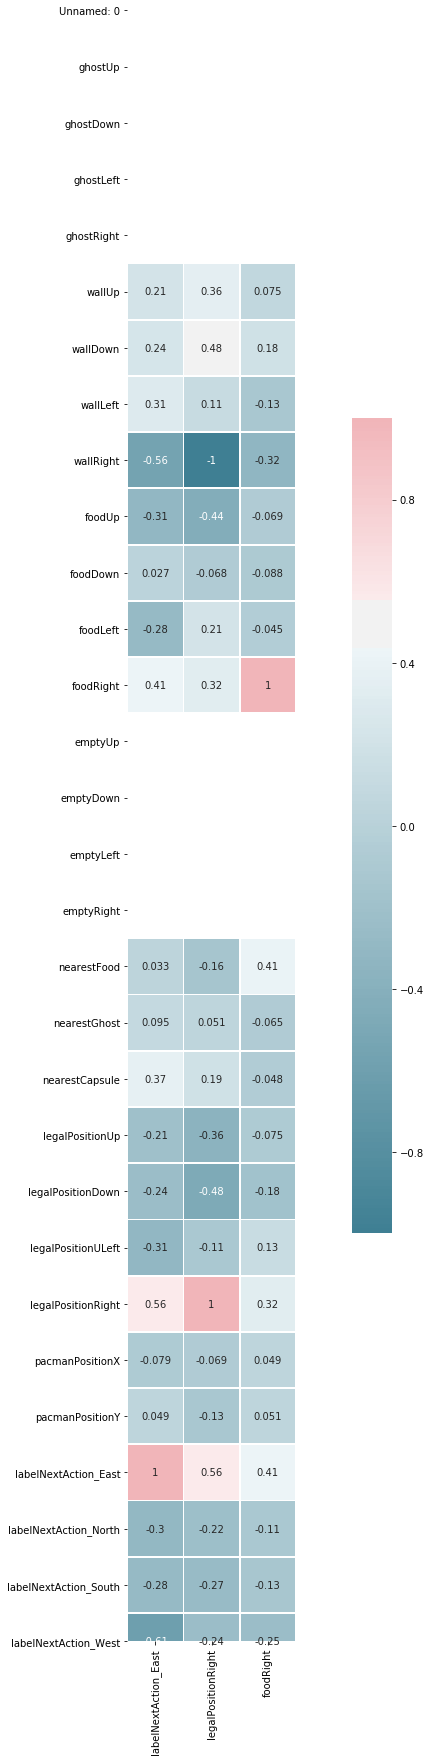

In [64]:

mask = np.zeros_like(corr[mostCorrelated], dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 30))

sns.heatmap(corr[mostCorrelated], mask=mask, cmap=cmap, vmax= 1, center=0.5,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}, annot=True)

In [65]:
XEast = df.drop(["labelNextAction_East", "labelNextAction_South","labelNextAction_West","labelNextAction_North"], axis=1)
XEast = XEast.drop(df.columns[0],axis=1)
yEast = df["labelNextAction_East"]
lm = linear_model.LinearRegression()
model = lm.fit(XEast,yEast)
model.score(XEast,yEast)

0.6145138446079405

In [66]:
XEast

,ghostUp,ghostDown,ghostLeft,ghostRight,wallUp,wallDown,wallLeft,wallRight,foodUp,foodDown,...,emptyRight,nearestFood,nearestGhost,nearestCapsule,legalPositionUp,legalPositionDown,legalPositionULeft,legalPositionRight,pacmanPositionX,pacmanPositionY
0,False,False,False,False,True,True,False,False,False,False,...,1,1.0,0.066667,0.083333,False,False,True,True,0.45,0.142857
1,False,False,False,False,True,True,False,False,False,False,...,1,0.5,0.076923,0.090909,False,False,True,True,0.40,0.142857
2,False,False,False,False,True,True,False,False,False,False,...,1,0.5,0.100000,0.111111,False,False,True,True,0.35,0.142857
3,False,False,False,False,False,True,False,False,True,False,...,1,1.0,0.166667,0.166667,True,False,True,True,0.30,0.142857
4,False,False,False,False,True,True,False,False,False,False,...,1,0.5,0.125000,0.166667,False,False,True,True,0.25,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45820,False,False,False,False,False,False,True,True,True,False,...,1,1.0,0.062500,0.000000,True,True,False,False,0.05,0.428571
45821,False,False,False,False,False,False,True,True,True,False,...,1,1.0,0.055556,0.000000,True,True,False,False,0.05,0.571429
45822,False,False,False,False,True,False,True,False,False,False,...,1,0.5,0.058824,0.000000,False,True,False,True,0.05,0.714286
45823,False,False,False,False,True,True,False,False,False,False,...,1,1.0,0.076923,0.000000,False,False,True,True,0.10,0.714286


In [67]:
from sklearn.metrics import explained_variance_score

yPred = model.predict(XEast)

explained_variance_score(yEast, yPred)


0.61451385623197

In [68]:
from sklearn.model_selection import train_test_split
lm = linear_model.LinearRegression()


resultValues = []
resultVariance = []
for i in range(0,10) :
    xtrain, xtest, ytrain, ytest = train_test_split(XEast, yEast, test_size=0.2)
    modelCV = lm.fit(xtrain,ytrain)
    #print("taux d'erreur")
    #print(1 - modelCV.score(xtrain,ytrain))
    resultVariance.append(modelCV.score(xtrain,ytrain) - modelCV.score(xtest,ytest))
    resultValues.append(modelCV.score(xtest,ytest))
    if (modelCV.score(xtest,ytest) < 0 ) :
        break
    #1 - modelCV.score(xtest,ytest)
    
print(np.mean(resultValues))
print(np.mean(resultVariance))

0.6155937333890223
-0.0014832941211188055


In [57]:
xtrain.mean(axis=0)

ghostUp               0.000000
ghostDown             0.000000
ghostLeft             0.000000
ghostRight            0.000000
wallUp                0.462601
wallDown              0.528769
wallLeft              0.318757
wallRight             0.338320
foodUp                0.237054
foodDown              0.138090
foodLeft              0.163982
foodRight             0.167434
emptyUp               1.000000
emptyDown             1.000000
emptyLeft             1.000000
emptyRight            1.000000
nearestFood           0.433257
nearestGhost          0.037975
nearestCapsule        0.000000
legalPositionUp       0.537399
legalPositionDown     0.471231
legalPositionULeft    0.681243
legalPositionRight    0.661680
pacmanPositionX       0.041427
pacmanPositionY       0.265823
dtype: float64